In [1]:
from run_sim import run_sim
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# set up dataframe for collecting event data
mtd_stats, attack_stats = run_sim()

Target Node is:  67


In [3]:
print(mtd_stats.dict())
mtd_operation_record = pd.DataFrame(mtd_stats.mtd_operation_record)

mtd_operation_record

{'Total suspended MTD': 195, 'Total triggered MTD': 665, 'Total executed MTD': 470, 'Total attack interrupted': 350}


,name,start_time,finish_time,duration
0,IPShuffle,30.060280,80.961102,50.900822
1,HostTopologyShuffle,90.899264,131.457436,40.558172
2,UserShuffle,121.465307,131.527286,10.061979
3,UserShuffle,152.015771,162.037891,10.022120
4,osdiversity,182.277379,212.745382,30.468003
...,...,...,...,...
465,CompleteTopologyShuffle,20143.227535,20213.532278,70.304743
466,PortShuffle,20204.467188,20244.931811,40.464623
467,CompleteTopologyShuffle,20234.624055,20304.633576,70.009521
468,PortShuffle,20265.041099,20306.285072,41.243973


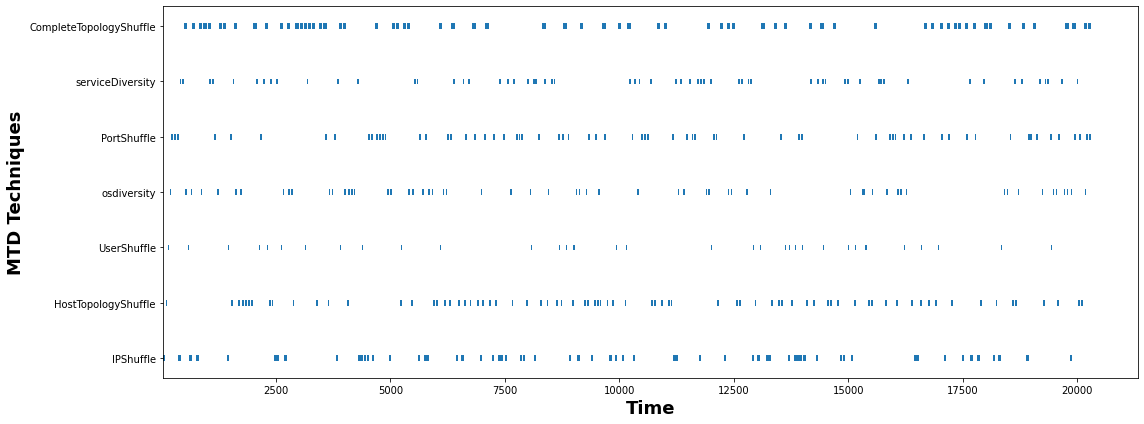

In [4]:
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(mtd_operation_record['name'], mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.1)

plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.show()

In [5]:
attack_operation_record = pd.DataFrame(attack_stats.attack_operation_record)
attack_operation_record

,name,start_time,finish_time,duration,interrupted_in,interrupted_by,current_host,current_host_attempt,cumulative_attempts,compromise_host,cumulative_compromised_hosts
0,SCAN_HOST,0.000000,5.000000,5.000000,,,-1,0,0,,0
1,ENUM_HOST,5.000000,7.000000,2.000000,,,-1,0,0,,0
2,SCAN_PORT,7.000000,17.000000,10.000000,,,0,1,0,,0
3,EXPLOIT_VULN,17.000000,47.316302,30.316302,,,0,1,0,0,0
4,SCAN_NEIGHBOR,47.316302,52.316302,5.000000,,,0,1,14,,1
...,...,...,...,...,...,...,...,...,...,...,...
2310,SCAN_PORT,20246.931811,20256.931811,10.000000,,,19,5,888,,199
2311,EXPLOIT_VULN,20256.931811,20288.203589,31.271778,,,19,5,888,19,199
2312,SCAN_NEIGHBOR,20288.203589,20293.203589,5.000000,,,19,5,888,,200
2313,ENUM_HOST,20293.203589,20295.203589,2.000000,,,19,5,888,,200


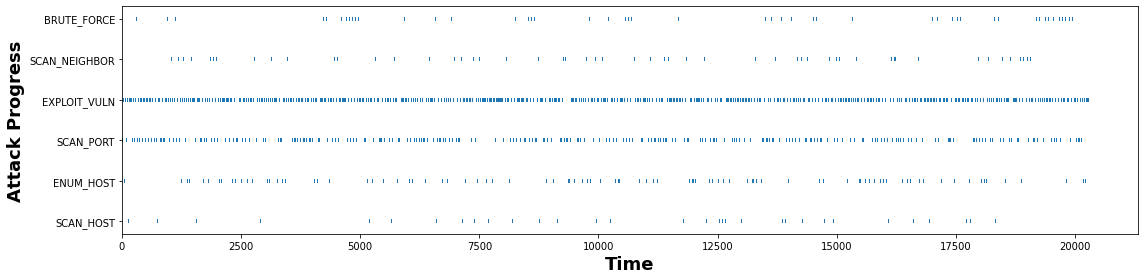

In [6]:
fig2, ax2 = plt.subplots(1, figsize=(16, 4))
ax2.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1)

plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig2.tight_layout()
plt.show()

In [7]:
attack_operation_record[(attack_operation_record['name'] == 'SCAN_PORT') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,interrupted_in,interrupted_by,current_host,current_host_attempt,cumulative_attempts,compromise_host,cumulative_compromised_hosts
356,SCAN_PORT,3325.965507,3335.965507,10.0,,,73,1,486,73,35
386,SCAN_PORT,3617.200974,3627.200974,10.0,,,61,2,493,61,38
440,SCAN_PORT,4104.077997,4114.077997,10.0,,,95,3,523,95,44
546,SCAN_PORT,5258.441368,5268.441368,10.0,,,86,3,564,86,51
611,SCAN_PORT,5783.870059,5793.870059,10.0,,,73,3,591,73,58
667,SCAN_PORT,6322.662055,6332.662055,10.0,,,72,2,595,72,62
673,SCAN_PORT,6345.662055,6355.662055,10.0,,,52,2,595,52,63
1013,SCAN_PORT,9282.960440,9292.960440,10.0,,,88,3,703,88,89
1028,SCAN_PORT,9344.601518,9354.601518,10.0,,,59,6,703,59,90
1039,SCAN_PORT,9377.601518,9387.601518,10.0,,,129,1,703,129,91


In [8]:
attack_operation_record[(attack_operation_record['name'] == 'EXPLOIT_VULN') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,interrupted_in,interrupted_by,current_host,current_host_attempt,cumulative_attempts,compromise_host,cumulative_compromised_hosts
3,EXPLOIT_VULN,17.000000,47.316302,30.316302,,,0,1,0,0,0
16,EXPLOIT_VULN,150.457436,182.952311,32.494876,,,28,3,28,28,1
27,EXPLOIT_VULN,327.478526,360.611478,33.132953,,,46,1,63,46,2
38,EXPLOIT_VULN,449.340853,479.701724,30.360871,,,34,1,82,34,3
45,EXPLOIT_VULN,511.436054,542.549188,31.113134,,,22,1,92,22,4
...,...,...,...,...,...,...,...,...,...,...,...
2199,EXPLOIT_VULN,18889.456621,18919.716403,30.259782,,,15,2,888,15,195
2210,EXPLOIT_VULN,18973.117352,19003.406101,30.288748,,,16,2,888,16,196
2216,EXPLOIT_VULN,19033.330033,19063.644683,30.314651,,,17,1,888,17,197
2299,EXPLOIT_VULN,20141.388458,20171.649468,30.261011,,,18,9,888,18,198


In [9]:
attack_operation_record[(attack_operation_record['name'] == 'BRUTE_FORCE') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,interrupted_in,interrupted_by,current_host,current_host_attempt,cumulative_attempts,compromise_host,cumulative_compromised_hosts


In [10]:
if not os.path.exists('data_analysis'):
    os.makedirs(os.path.dirname('data_analysis'))

attack_operation_record.to_csv('data_analysis/attack_operation_record.csv',index=False)
mtd_operation_record.to_csv('data_analysis/mtd_operation_record.csv', index=False)